## Importing Libraries and Getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('dataset/StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Handling Missing Values

In [6]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

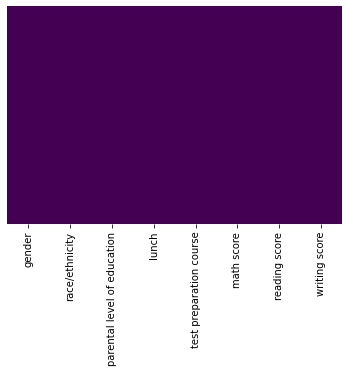

In [7]:
sns.heatmap(data.isnull() ,cbar=False ,cmap='viridis' ,yticklabels=False)
plt.xticks(rotation=90)
plt.show()

## EDA

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

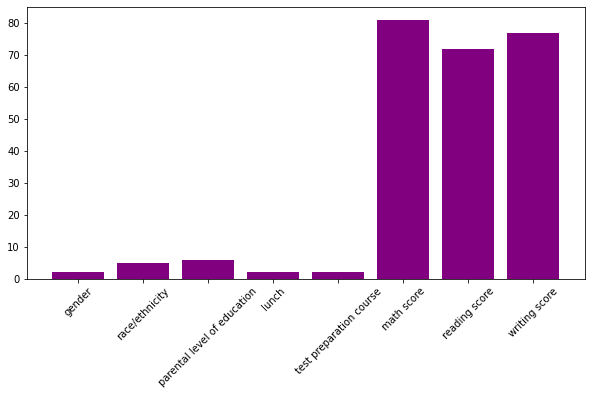

In [8]:
# getting unique values of each feature 
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.bar(data.columns ,data.nunique() ,color='purple')
data.nunique()

### Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

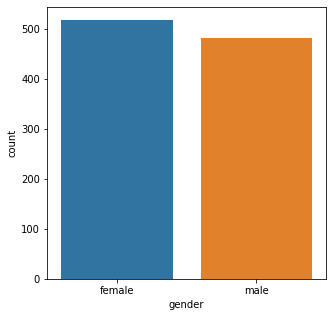

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['gender'])

### Parental level of education

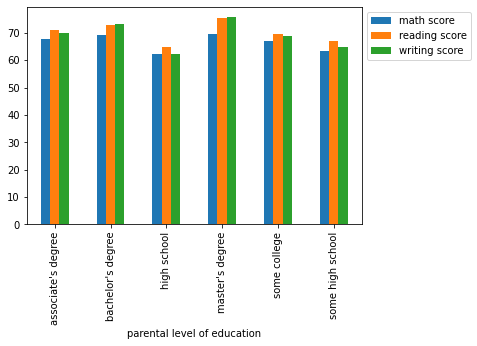

In [10]:
data.groupby(['parental level of education']).mean().plot.bar()
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

In [11]:
data_male = data[data['gender'] =='male']
data_female = data[data['gender'] == 'female']

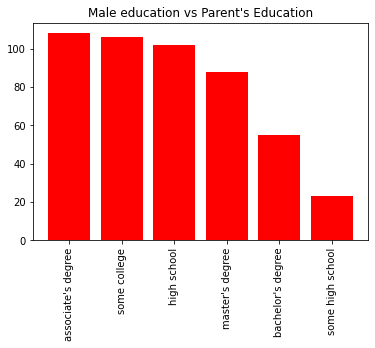

In [12]:
plt.xticks(rotation=90)
plt.title("Male education vs Parent's Education")
plt.bar(data_male["parental level of education"].unique(),
        data_male["parental level of education"].value_counts(),color='red')
plt.show()

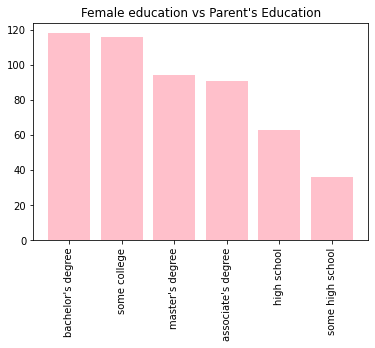

In [13]:
plt.xticks(rotation=90)
plt.title("Female education vs Parent's Education")
plt.bar(data_female["parental level of education"].unique(),
        data_female["parental level of education"].value_counts(), color='pink')
plt.show()

In [14]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### Lunch

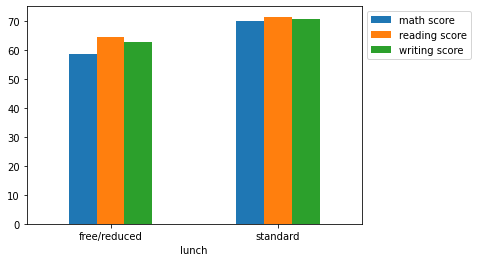

In [15]:
data.groupby(['lunch']).mean().plot.bar()
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=[1,1])
plt.show()

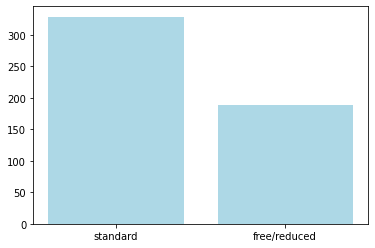

standard        329
free/reduced    189
Name: lunch, dtype: int64

In [16]:
plt.bar(data_female['lunch'].unique() ,data_female['lunch'].value_counts() ,color='lightblue')
plt.show()
data_female['lunch'].value_counts()

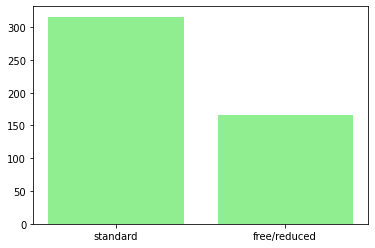

standard        316
free/reduced    166
Name: lunch, dtype: int64

In [17]:
plt.bar(sorted(data_male['lunch'].unique(),reverse=True) ,data_male['lunch'].value_counts() ,color='lightgreen')
plt.show()
data_male['lunch'].value_counts()

### Race / Ethinicity

In [18]:
data['race/ethnicity'].value_counts(ascending=False)


group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

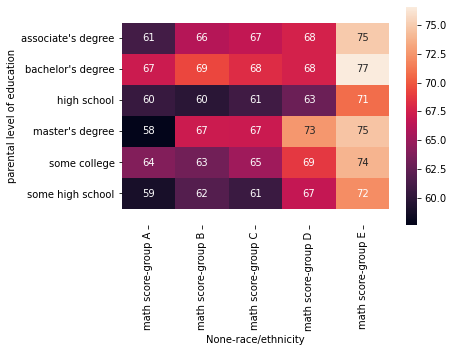

In [19]:
# math-scores of each race vs parental level of education

pivot = pd.pivot_table(
    data=data, index=["parental level of education"], columns=["race/ethnicity"] ,aggfunc={'math score' : np.mean})

heatmap = sns.heatmap(data=pivot ,annot=True)
bottom ,top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5 ,top -0.5)
plt.show()


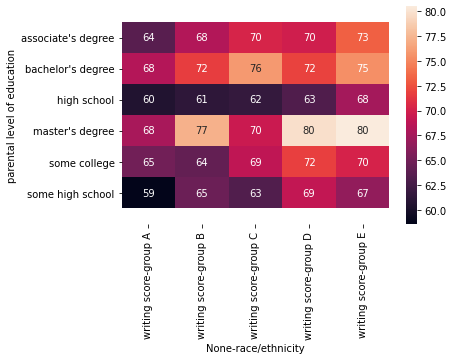

In [20]:
# writing-scores of each race vs parental level of education

pivot = pd.pivot_table(
    data=data, index=["parental level of education"], columns=["race/ethnicity"], aggfunc={'writing score': np.mean})

heatmap = sns.heatmap(data=pivot, annot=True)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


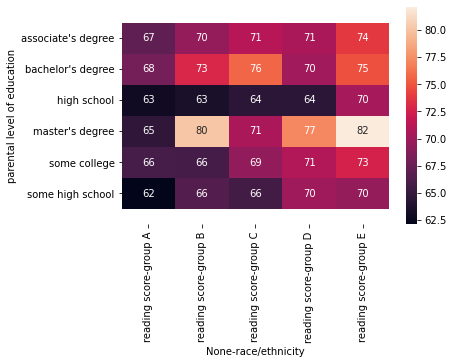

In [21]:
# reading-scores of each race vs parental level of education

pivot = pd.pivot_table(
    data=data, index=["parental level of education"], columns=["race/ethnicity"], aggfunc={'reading score': np.mean})

heatmap = sns.heatmap(data=pivot, annot=True)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


In [22]:
index = {0: "Group A", 1: "Group B", 2: "Group C", 3: "Group D", 4: "Group E"}

A = data[data["race/ethnicity"] == "group A"]
B = data[data["race/ethnicity"] == "group B"]
C = data[data["race/ethnicity"] == "group C"]
D = data[data["race/ethnicity"] == "group D"]
E = data[data["race/ethnicity"] == "group E"]


In [23]:
for i, j in enumerate([A, B, C, D, E]):
    print(index[i], " :")

    print(j["parental level of education"].value_counts())
    print("Total number of students :", sum(j["parental level of education"].value_counts()))
    print("\n")


Group A  :
some high school      24
some college          18
high school           18
associate's degree    14
bachelor's degree     12
master's degree        3
Name: parental level of education, dtype: int64
Total number of students : 89


Group B  :
high school           48
associate's degree    41
some high school      38
some college          37
bachelor's degree     20
master's degree        6
Name: parental level of education, dtype: int64
Total number of students : 190


Group C  :
associate's degree    78
some college          69
high school           64
some high school      49
bachelor's degree     40
master's degree       19
Name: parental level of education, dtype: int64
Total number of students : 319


Group D  :
some college          67
associate's degree    50
some high school      50
high school           44
bachelor's degree     28
master's degree       23
Name: parental level of education, dtype: int64
Total number of students : 262


Group E  :
associate's degree    

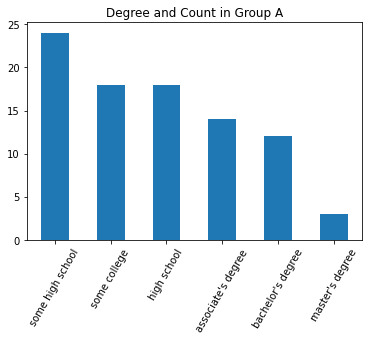

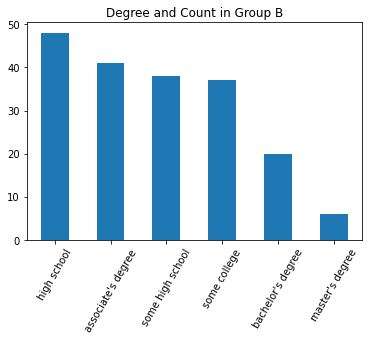

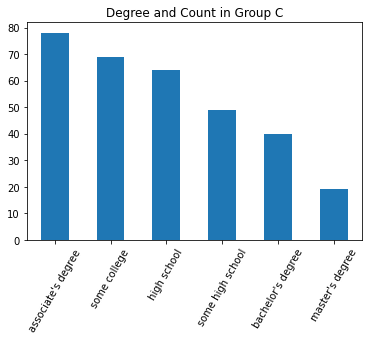

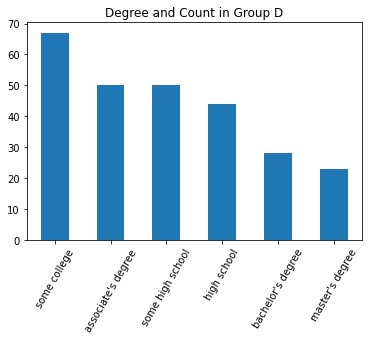

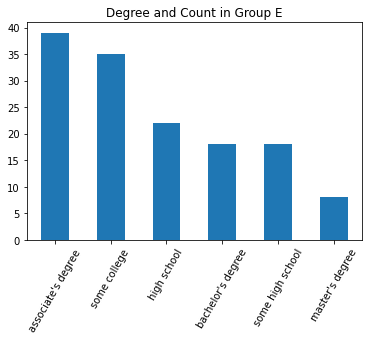

In [24]:
for i, j in enumerate([A, B, C, D, E]):
    j['parental level of education'].value_counts().plot.bar()

    plt.title('Degree and Count in {}'.format(index[i]))
    plt.xticks(rotation=60)
    plt.show()


### Gender vs Race

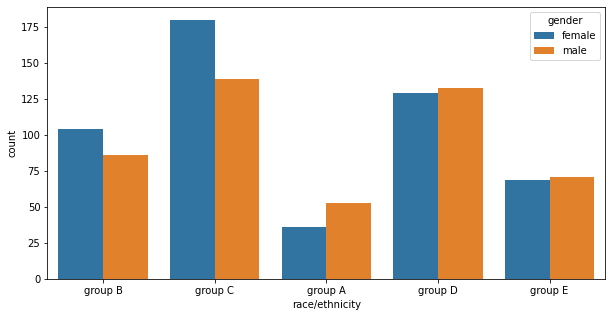

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['race/ethnicity'] ,hue=data['gender'])
plt.show()

In [26]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Handling Numerical Features

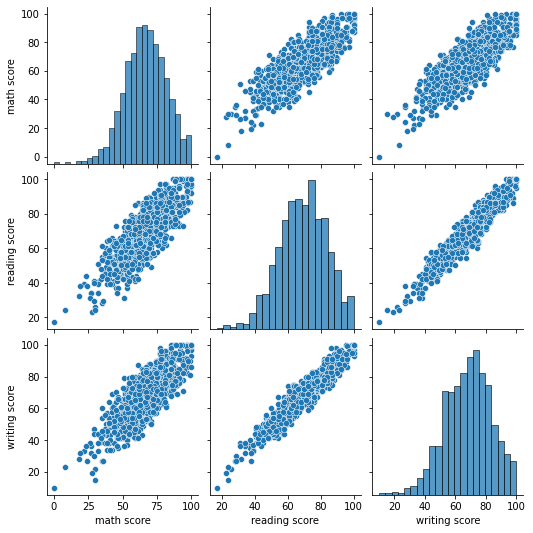

In [27]:
sns.pairplot(data)
plt.show()

## Correlation

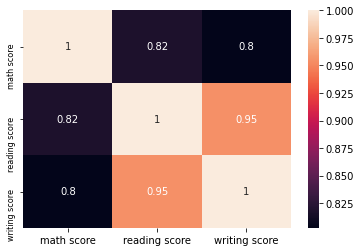

In [28]:
sns.heatmap(data.corr() ,annot=True)
plt.yticks(fontsize=8)
plt.show()

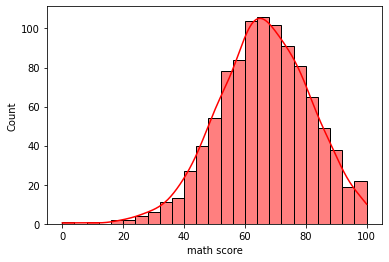

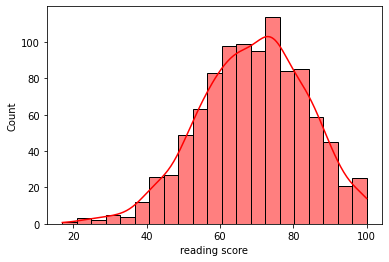

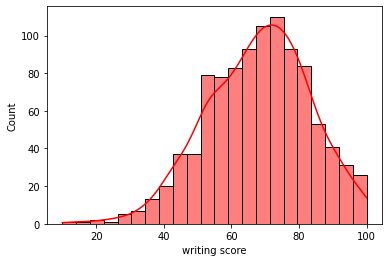

In [29]:
# histograms for the numerical features 

for i in data.columns:
    if data[i].dtypes !='O':
        sns.histplot(data[i] ,kde=True,color='r')

        plt.show()

# Model Building

## Creating New Features

In [30]:
data['read/write'] = data['reading score'] / data['writing score']
data['gender/race'] = data['gender'] + data['race/ethnicity']

## One Hot Encoding

In [31]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,read/write,gender/race
0,female,group B,bachelor's degree,standard,none,72,72,74,0.972973,femalegroup B
1,female,group C,some college,standard,completed,69,90,88,1.022727,femalegroup C
2,female,group B,master's degree,standard,none,90,95,93,1.021505,femalegroup B
3,male,group A,associate's degree,free/reduced,none,47,57,44,1.295455,malegroup A
4,male,group C,some college,standard,none,76,78,75,1.040000,malegroup C


In [32]:
def linearlabel(data ,columns=None):
    if columns!= None and type(columns)==list:
        data = pd.get_dummies(data=data ,columns=columns ,drop_first=True)
    return data

In [33]:
data = linearlabel(data, columns=["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course", "gender/race"])
data.head()

,math score,reading score,writing score,read/write,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,...,test preparation course_none,gender/race_femalegroup B,gender/race_femalegroup C,gender/race_femalegroup D,gender/race_femalegroup E,gender/race_malegroup A,gender/race_malegroup B,gender/race_malegroup C,gender/race_malegroup D,gender/race_malegroup E
0,72,72,74,0.972973,0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
1,69,90,88,1.022727,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,90,95,93,1.021505,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,47,57,44,1.295455,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,76,78,75,1.040000,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [34]:
X = data.drop('gender_male' ,axis=1)
y = data['gender_male']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 24), (330, 24), (670,), (330,))

## SVM 

In [36]:
from sklearn.svm import SVC 
svc = SVC(kernel="linear")
svc.fit(X_train ,y_train)

SVC(kernel='linear')

In [37]:
y_pred_svc = svc.predict(X_test)

Accuracy Score using SVM :  1.0
f1 score training :  1.0
f1 score testing :  1.0


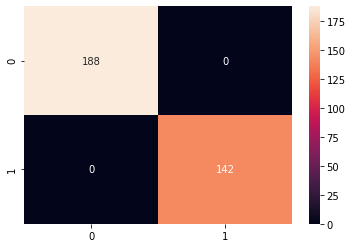

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

print('Accuracy Score using SVM : ',accuracy_score(y_test ,y_pred_svc))
print("f1 score training : ", f1_score(y_train, svc.predict(X_train)))
print("f1 score testing : ", f1_score(y_test, y_pred_svc))

sns.heatmap(confusion_matrix(y_test ,y_pred_svc) ,annot=True,fmt='.3g')
plt.show()

## Logistic Regression 

In [39]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(solver='lbfgs' ,max_iter=3000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=3000)

In [40]:
y_pred_lr = lr.predict(X_test)

Accuracy Score using Logistic Regression :  0.990909090909091
f1 score training :  0.9985315712187959
f1 score testing :  0.9894736842105264


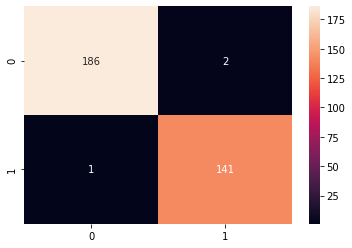

In [41]:
print('Accuracy Score using Logistic Regression : ', accuracy_score(y_test, y_pred_lr))
print("f1 score training : ", f1_score(y_train, lr.predict(X_train)))
print("f1 score testing : ", f1_score(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='.3g')
plt.show()